<a href="https://colab.research.google.com/github/ethanrimes/stat-471-final-project/blob/main/CIS_545_Group_Project_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIS 545 Big Data Analysis
Spring 2021
Final Project
Ethan Kallett, Christopher Fu, Philip Situmorang

**Project Outline**

We seek to create a model that helps us understand how various aspects of a country's educational system affect economic growth. The objective is to train models that predict the level of a nation's economic advancement (measured in terms of real GDP per capita in 2021 dollars), given inputs such as percentage of GDP spent on education or the duration of compulsory education in that nation.

Why is this project interesting? It would provide insight into what kind of educational polcicy drives economic growth and what kind perpetuates stagnation. It would have revelance for economists and policy makers everywhere as they seek to decide how to best invest in their nation's human capital.

**Index**

We divide our project into four parts

1. Feature Selection and Data Wrangling
2. Exploratory Data Analysis
3. Modeling
4. Interpreting Findings

# **Part I - Feature Selection and Data Wrangling**

In this first Phase we select the features that we want to incorporate in training and testing our models. We obtain the data from World Bank Education Data: https://www.kaggle.com/theworldbank/world-bank-intl-education?select=international_education

The original dataset has approximately 5 million rows. After selecting the features that we deem to measure a country's level of educational infrastructure, we use BigQuery on Kaggle to query our dataset. The 19 features we selected brought down the rows to approximately 77,000 rows. We exported out the csvs and imported them into colab.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


## Feature Selection

We selected 19 features that we believe are highly correlated with a country's economic development level. We used Kaggle's bigquery and downloaded the individual csv files of each feature. The features are described below.


In [ ]:
# features 1-3, expenditure related features
ft_1 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/expenditure_as_percentage_of_gdp.csv')
ft_2 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_total_public_expenditure.csv')
ft_3 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/staff_compensation_as_percentage_of_expenditure.csv')

# features 4-6, pupil teacher ratio
ft_4 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/pupil_teacher_ratio_primary.csv')
ft_5 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/pupil_teacher_ratio_secondary.csv')
ft_6 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/pupil_teacher_ratio_tertiary.csv')

# features 7-11, teacher training
ft_7 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_trained_teachers_preprimary.csv')
ft_8 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_trained_teachers_primary.csv')
ft_9 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_trained_teachers_low_secondary_ed.csv')
ft_10 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_trained_teachers_secondary.csv')
ft_11 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/percentage_of_trained_teachers_postsec_nontertiary.csv')

# features 12-16, schooling duration
ft_12 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/thr_duration_of_preprimary_education.csv')
ft_13 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/thr_duration_of_primary_ed.csv')
ft_14 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/thr_duration_of_lower_secondary_ed.csv')
ft_15 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/thr_duration_of_upper_secondary_education.csv')
ft_16 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/thr_duration_of_post_secondary_non_tertiary_ed.csv')

# feature 17, duration of compulsory education
ft_17 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/duration_of_compulsory_education.csv')

# features 18-19, internet users and personal computers
ft_18 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/internet_users.csv')
ft_19 = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Education Indicators csvs/personal_computers.csv')

# feature 20-21, World Bank Development Indicators
wb_development_indicators = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Data/Indicators.csv')

Select the desired indicators from the World Bank Development Indicators and format them to match with the education data

In [ ]:
wb_development_indicators = wb_development_indicators[(wb_development_indicators['IndicatorName'] == 'GDP per capita (constant 2005 US$)')
| (wb_development_indicators['IndicatorName'] == 'Mobile cellular subscriptions (per 100 people)') | (wb_development_indicators['IndicatorName'] == 'Urban population (% of total)')]
wb_development_indicators = wb_development_indicators.rename(columns={'CountryName': 'country_name', 'CountryCode': 'country_code', 'IndicatorName': 'indicator_name', 'IndicatorCode': 'indicator_code', 'Value': 'value', 'Year': 'year'})
wb_year = wb_development_indicators['year']
wb_development_indicators = wb_development_indicators.drop(columns='year')
ft_20 = wb_development_indicators
ft_20['year'] = wb_year

Combine all of the dataframes

In [ ]:
ft_lst = [ft_1, ft_2, ft_3, ft_4, ft_5, ft_6, ft_7, ft_8, ft_9, ft_10, ft_11, ft_12, ft_13, ft_14, ft_15, ft_16, ft_17, ft_18, ft_19, ft_20]

combined_df = pd.DataFrame()
for i in ft_lst:
  combined_df = combined_df.append(i)

combined_df

,country_name,country_code,indicator_name,indicator_code,value,year
0,South Sudan,SSD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.810940,2016
1,Brunei Darussalam,BRN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.425410,2016
2,Kiribati,KIR,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.793130,1970
3,Seychelles,SYC,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.188480,1970
4,Togo,TGO,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.113800,1970
...,...,...,...,...,...,...
5640847,Zambia,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,67.338164,2014
5641111,Zambia,ZMB,Urban population (% of total),SP.URB.TOTL.IN.ZS,40.472000,2014
5641275,Zimbabwe,ZWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,458.102904,2014
5641456,Zimbabwe,ZWE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,80.816421,2014


## Temporal Restriction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779f1fdb90>]],
      dtype=object)

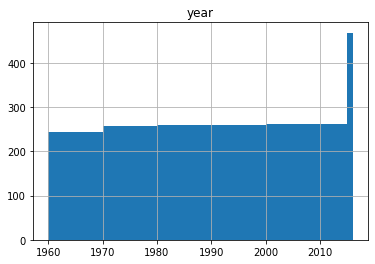

In [ ]:
country_year_grouped_df = combined_df.groupby(by=['country_name', 'year']).count().reset_index()
country_year_grouped_df.hist(column='year', bins=56)

Because the data of the 1960s is substantially sparser than the data after 1970, we can drop all the tuples from this decade.

In [ ]:
combined_df = combined_df[combined_df['year'] > 1970]
combined_df

,country_name,country_code,indicator_name,indicator_code,value,year
0,South Sudan,SSD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.810940,2016
1,Brunei Darussalam,BRN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.425410,2016
21,China,CHN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.386990,1971
22,Canada,CAN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,7.710190,1971
23,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.160360,1971
...,...,...,...,...,...,...
5640847,Zambia,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,67.338164,2014
5641111,Zambia,ZMB,Urban population (% of total),SP.URB.TOTL.IN.ZS,40.472000,2014
5641275,Zimbabwe,ZWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,458.102904,2014
5641456,Zimbabwe,ZWE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,80.816421,2014


## Data Cleaning

Drop nulls, i.e. drop data where the country, indicator or year is unclear.


In [ ]:
combined_df = combined_df.dropna()
combined_df

,country_name,country_code,indicator_name,indicator_code,value,year
0,South Sudan,SSD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.810940,2016
1,Brunei Darussalam,BRN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.425410,2016
21,China,CHN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.386990,1971
22,Canada,CAN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,7.710190,1971
23,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.160360,1971
...,...,...,...,...,...,...
5640847,Zambia,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,67.338164,2014
5641111,Zambia,ZMB,Urban population (% of total),SP.URB.TOTL.IN.ZS,40.472000,2014
5641275,Zimbabwe,ZWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,458.102904,2014
5641456,Zimbabwe,ZWE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,80.816421,2014


Create a dictionary for transforming indicator_codes to indicator_names

In [ ]:
ind_df = combined_df[['indicator_name', 'indicator_code', 'value']].groupby(by=['indicator_name', 'indicator_code']).count().reset_index()

ind_dict = {}

for index, row in ind_df.iterrows():
  ind_dict[row.iloc[1]] = row.iloc[0]

ind_dict

{'IT.CEL.SETS.P2': 'Mobile cellular subscriptions (per 100 people)',
 'IT.CMP.PCMP.P2': 'Personal computers (per 100 people)',
 'IT.NET.USER.P2': 'Internet users (per 100 people)',
 'NY.GDP.PCAP.KD': 'GDP per capita (constant 2005 US$)',
 'SE.COM.DURS': 'Duration of compulsory education (years)',
 'SE.PRM.DURS': 'Theoretical duration of primary education (years)',
 'SE.PRM.ENRL.TC.ZS': 'Pupil-teacher ratio in primary education (headcount basis)',
 'SE.PRM.TCAQ.ZS': 'Percentage of teachers in primary education who are trained, both sexes (%)',
 'SE.SEC.DURS.LO': 'Theoretical duration of lower secondary education (years)',
 'SE.SEC.DURS.UP': 'Theoretical duration of upper secondary education (years)',
 'SE.SEC.ENRL.TC.ZS': 'Pupil-teacher ratio in secondary education (headcount basis)',
 'SE.SEC.TCAQ.ZS': 'Percentage of teachers in secondary education who are trained, both sexes (%)',
 'SE.XPD.CUR.TOTL.ZS': 'Current expenditure as % of total expenditure in public institutions (%)',
 'SE.X

## Data Wrangling

Now begins the difficult task of transposing this data into a dataframe with indicators as columns rather than values in tuples. To do so, we will first split up the dataframe into three separate components.

In [ ]:
indicator_code_df = combined_df[['indicator_code','indicator_name']].drop_duplicates()
countries_df = combined_df[['country_code', 'country_name']].drop_duplicates()
year_df = combined_df[['year']].drop_duplicates()

In [ ]:
code_lst = []
for i in indicator_code_df['indicator_code']:
  code_lst.append(i)

In [ ]:
cols = ['year','country_code','country_name'] + code_lst
input_df = pd.DataFrame(columns = cols)

input_df

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,UIS.TRTP.2,SE.SEC.TCAQ.ZS,UIS.TRTP.4,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2


In [ ]:
df = countries_df
result_df = pd.DataFrame()
for year in year_df['year']:
  df['year'] = year
  result_df = result_df.append(df)

result_df = result_df.reset_index(drop=True)
result_df

,country_code,country_name,year
0,SSD,South Sudan,2016
1,BRN,Brunei Darussalam,2016
2,CHN,China,2016
3,CAN,Canada,2016
4,AFG,Afghanistan,2016
...,...,...,...
12231,PRK,"Korea, Dem. Rep.",2015
12232,ROM,Romania,2015
12233,TMP,Timor-Leste,2015
12234,WBG,West Bank and Gaza,2015


In [ ]:
input_df[['year','country_code','country_name']] = result_df[['year','country_code','country_name']]
input_df

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,UIS.TRTP.2,SE.SEC.TCAQ.ZS,UIS.TRTP.4,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
0,2016,SSD,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,BRN,Brunei Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,CHN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,CAN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,2015,PRK,"Korea, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12232,2015,ROM,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12233,2015,TMP,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12234,2015,WBG,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df

,country_name,country_code,indicator_name,indicator_code,value,year
0,South Sudan,SSD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.810940,2016
1,Brunei Darussalam,BRN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.425410,2016
21,China,CHN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.386990,1971
22,Canada,CAN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,7.710190,1971
23,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,1.160360,1971
...,...,...,...,...,...,...
5640847,Zambia,ZMB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,67.338164,2014
5641111,Zambia,ZMB,Urban population (% of total),SP.URB.TOTL.IN.ZS,40.472000,2014
5641275,Zimbabwe,ZWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,458.102904,2014
5641456,Zimbabwe,ZWE,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,80.816421,2014


In [ ]:
combined_df.loc[(combined_df['year'] == 2016) & (combined_df['country_code'].isin(['SSD'])) & (combined_df['indicator_code'].isin(['SE.XPD.TOTL.GD.ZS']))]

In [ ]:
def get_value(df, year, country_code, indicator_code):
  row = df.loc[(df['year'] == year) & (df['country_code'].isin([str(country_code)])) & (df['indicator_code'].isin([str(indicator_code)]))]
  val = row['value'][0]
  return val

In [ ]:
val = get_value(combined_df, 2016, 'SSD', 'SE.XPD.TOTL.GD.ZS')
print(val)

1.81094002723694


In [ ]:
input_df_tr = input_df.copy()
input_df

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,UIS.TRTP.2,SE.SEC.TCAQ.ZS,UIS.TRTP.4,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
0,2016,SSD,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,BRN,Brunei Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,CHN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,CAN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,2015,PRK,"Korea, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12232,2015,ROM,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12233,2015,TMP,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12234,2015,WBG,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for code in code_lst:
  feature = combined_df.loc[(combined_df['indicator_code'] == code)]
  df = pd.merge(input_df_tr,feature, how = 'left', left_on = ['year','country_code'], right_on = ['year','country_code'])
  input_df_tr[str(code)] = df['value']

## Inflation

Convert GDP from 2005 dollars to 2021 dollars and drop tuples where GDP is null.

In [ ]:
input_df_tr['NY.GDP.PCAP.KD'] = input_df_tr['NY.GDP.PCAP.KD'].apply(lambda x: 1.37*x)
input_df_tr = input_df_tr[(input_df_tr['NY.GDP.PCAP.KD'].notna())]
input_df_tr

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,UIS.TRTP.2,SE.SEC.TCAQ.ZS,UIS.TRTP.4,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
268,1971,CHN,China,1.38699,NaN,NaN,29.147289,21.83943,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,17.292,206.088316,NaN
269,1971,CAN,Canada,7.71019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,76.090,26416.023310,NaN
271,1971,KEN,Kenya,3.92982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,3.0,4.0,NaN,NaN,NaN,NaN,10.778,580.929759,NaN
272,1971,SYC,Seychelles,4.06639,NaN,NaN,24.798981,20.64567,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,3.0,4.0,NaN,NaN,NaN,NaN,40.337,6395.156843,NaN
273,1971,PRI,Puerto Rico,7.25052,NaN,NaN,NaN,26.27866,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,59.230,12327.494503,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,2014,ZAR,"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.976,388.349122,53.493216
11966,2014,ROM,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.393,8571.424868,105.914150
11967,2014,TMP,Timor-Leste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.131,1053.805967,58.736298
11968,2014,WBG,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.026,1904.137565,72.075153


In [ ]:
input_df = input_df_tr
input_df.to_csv('selected_indicators_ethan.csv', index = False)

# **Part II - EDA**



## Cleaning Data pt. 2

Now that the features are all lined up, we want to look at how the data looks in general. Right away, we notice there are many NaN values throughout the dataframe, and only two rows have all the values for the 19 features we identified.

In [ ]:
eda_df = pd.read_csv('/content/drive/MyDrive/CIS 545 - Group Project Folder/Data/selected_indicators_2.csv')

In [ ]:
feature_list = combined_df.groupby(['indicator_code','indicator_name']).mean()
feature_list

,,value,year
indicator_code,indicator_name,,
IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),24.605716,1994.655905
IT.CMP.PCMP.P2,Personal computers (per 100 people),9.834904,1998.729681
IT.NET.USER.P2,Internet users (per 100 people),21.000885,2003.955633
NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$),9645.388000,1994.420188
SE.COM.DURS,Duration of compulsory education (years),9.232517,2007.317890
SE.PRM.DURS,Theoretical duration of primary education (years),5.667798,1993.579126
SE.PRM.ENRL.TC.ZS,Pupil-teacher ratio in primary education (headcount basis),28.453189,1993.901846
SE.PRM.TCAQ.ZS,"Percentage of teachers in primary education who are trained, both sexes (%)",82.597231,2007.598094
SE.SEC.DURS.LO,Theoretical duration of lower secondary education (years),3.423585,1993.554613


In [ ]:
dct = {}
for column in eda_df.columns:
  # number of rows with values
  val = len(eda_df[column].dropna())
  percentage_valid = val/len(eda_df[column])
  dct[column] = percentage_valid

dct

{'IT.CEL.SETS.P2': 0.9101941747572816,
 'IT.CMP.PCMP.P2': 0.3131067961165049,
 'IT.NET.USER.P2': 0.5301191526919682,
 'NY.GDP.PCAP.KD': 1.0,
 'SE.COM.DURS': 0.3013018534863195,
 'SE.PRM.DURS': 0.776919682259488,
 'SE.PRM.ENRL.TC.ZS': 0.6909752868490733,
 'SE.PRM.TCAQ.ZS': 0.12864077669902912,
 'SE.SEC.DURS.LO': 0.7738305383936452,
 'SE.SEC.DURS.UP': 0.7738305383936452,
 'SE.SEC.ENRL.TC.ZS': 0.5301191526919682,
 'SE.SEC.TCAQ.ZS': 0.0703883495145631,
 'SE.XPD.CUR.TOTL.ZS': 0.12400706090026478,
 'SE.XPD.TOTL.GD.ZS': 0.36650485436893204,
 'SP.URB.TOTL.IN.ZS': 0.9983451015004413,
 'UIS.PTRHC.56': 0.34432921447484555,
 'UIS.THDUR.0': 0.776919682259488,
 'UIS.THDUR.4.A.GPV': 0.2249558693733451,
 'UIS.TRTP.0': 0.0868270079435128,
 'UIS.TRTP.2': 0.05924536628420123,
 'UIS.TRTP.4': 0.017210944395410415,
 'UIS.XSPENDP.FDPUB.FNS': 0.11440864960282436,
 'country_code': 1.0,
 'country_name': 1.0,
 'year': 1.0}

Some features have as low as 0.016, others have 85% filled.

If a country doesn't have data for more than 30% of the indicators AND more than 20 years of data, remove it from the data set.

This will also remove all of the regional groupings from the data and leave us only country-specific data.

In [ ]:
country_checker = eda_df.groupby(['country_name']).count().reset_index()

countries_to_remove = []
for index, row in country_checker.iterrows():
  if (row[1] < 20):
    countries_to_remove.append(row[0])
    continue
  zero_count = 0
  for i in range(2, len(row)):
    if (row[i] < 1):
      zero_count += 1
  if (zero_count > 7):
    countries_to_remove.append(row[0])

print(len(countries_to_remove))
countries_to_remove

71


['Afghanistan',
 'Andorra',
 'Angola',
 'Arab World',
 'Aruba',
 'Bosnia and Herzegovina',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'East Asia & Pacific',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faeroe Islands',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'Greenland',
 'Haiti',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: OECD',
 'High income: nonOECD',
 'Isle of Man',
 'Kosovo',
 'Latin America & Caribbean',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries:

In [ ]:
countries_removed = eda_df[~eda_df['country_name'].isin(countries_to_remove)]
countries_removed

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,UIS.TRTP.2,SE.SEC.TCAQ.ZS,UIS.TRTP.4,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
0,1971,CHN,China,1.38699,NaN,NaN,29.147289,21.83943,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,17.292,206.088316,NaN
1,1971,CAN,Canada,7.71019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,76.090,26416.023310,NaN
2,1971,KEN,Kenya,3.92982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,3.0,4.0,NaN,NaN,NaN,NaN,10.778,580.929759,NaN
3,1971,SYC,Seychelles,4.06639,NaN,NaN,24.798981,20.64567,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,3.0,4.0,NaN,NaN,NaN,NaN,40.337,6395.156843,NaN
4,1971,PRI,Puerto Rico,7.25052,NaN,NaN,NaN,26.27866,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,59.230,12327.494503,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,2014,VNM,Vietnam,NaN,NaN,NaN,19.213831,NaN,29.379419,97.746696,100.00000,100.000000,NaN,91.888840,3.0,5.0,4.0,3.0,1.0,9.0,41.000000,NaN,32.951,1476.735452,147.110888
9010,2014,BHR,Bahrain,2.46746,NaN,NaN,11.668840,9.85905,17.481421,49.722221,82.76754,82.747231,83.267670,NaN,3.0,6.0,3.0,3.0,2.0,9.0,90.503133,NaN,88.719,24521.919575,173.273933
9011,2014,GRD,Grenada,NaN,NaN,NaN,14.480040,12.54639,NaN,51.505020,62.97118,39.915070,39.948448,35.135139,2.0,7.0,3.0,2.0,2.0,12.0,51.600000,NaN,35.580,9222.479866,126.525122
9012,2014,UZB,Uzbekistan,NaN,NaN,NaN,18.120790,10.90033,11.239990,NaN,NaN,NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,12.0,35.500000,NaN,36.278,1314.615841,73.791165


Let's understand why some of these indicators have such vast amounts of missing data. Are there some countries that have better data in those indicators than others? Are there some time periods in which the quality of the data is better? Let's investigate.

We can define an indicator of interest as one where less than 30% of the data is available.

In [ ]:
#Let's drop some columns? Make another temporal cut?

inds_of_interest = ['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']
decades = pd.DataFrame(columns=inds_of_interest)

#70s
seventies = countries_removed[(countries_removed['year'] > 1970) & (countries_removed['year'] < 1980)]
seventies = seventies[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
sevs = []
for i in inds_of_interest:
  sevs.append(1 - (len(seventies) - np.sum(seventies[i].count()))/len(seventies))
sevss = pd.Series(sevs, index= inds_of_interest, name='1970-1979')
decades = decades.append(sevss, ignore_index=False)

#80s
eighties = countries_removed[(countries_removed['year'] > 1979) & (countries_removed['year'] < 1990)]
eighties = eighties[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
lst = []
for i in inds_of_interest:
  lst.append(1 - (len(eighties) - np.sum(eighties[i].count()))/len(eighties))
decades = decades.append(pd.Series(lst, index= inds_of_interest, name='1980-1989'), ignore_index=False)

#90s
nineties = countries_removed[(countries_removed['year'] > 1989) & (countries_removed['year'] < 1995)]
nineties = nineties[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
lst = []
for i in inds_of_interest:
  lst.append(1 - (len(nineties) - np.sum(nineties[i].count()))/len(nineties))
decades = decades.append(pd.Series(lst, index= inds_of_interest, name='1990-1994'), ignore_index=False)

#95s
nineties2 = countries_removed[(countries_removed['year'] > 1994) & (countries_removed['year'] < 2000)]
nineties2 = nineties2[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
lst = []
for i in inds_of_interest:
  lst.append(1 - (len(nineties2) - np.sum(nineties2[i].count()))/len(nineties2))
decades = decades.append(pd.Series(lst, index= inds_of_interest, name='1995-1999'), ignore_index=False)


#00s
twothousands = countries_removed[(countries_removed['year'] > 1999) & (countries_removed['year'] < 2010)]
twothousands = twothousands[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
lst = []
for i in inds_of_interest:
  lst.append(1 - (len(twothousands) - np.sum(twothousands[i].count()))/len(twothousands))
decades = decades.append(pd.Series(lst, index= inds_of_interest, name='2000-2009'), ignore_index=False)

#10s
tens = countries_removed[countries_removed['year'] > 2009]
tens = tens[['IT.CMP.PCMP.P2', 'SE.COM.DURS', 'SE.PRM.TCAQ.ZS', 'SE.XPD.CUR.TOTL.ZS', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0', 'UIS.TRTP.2', 'UIS.TRTP.4', 'UIS.XSPENDP.FDPUB.FNS']]
lst = []
for i in inds_of_interest:
  lst.append(1 - (len(tens) - np.sum(tens[i].count()))/len(tens))
decades = decades.append(pd.Series(lst, index= inds_of_interest, name='2010-2016'), ignore_index=False)

decades



,IT.CMP.PCMP.P2,SE.COM.DURS,SE.PRM.TCAQ.ZS,SE.XPD.CUR.TOTL.ZS,UIS.THDUR.4.A.GPV,UIS.TRTP.0,UIS.TRTP.2,UIS.TRTP.4,UIS.XSPENDP.FDPUB.FNS
1970-1979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1980-1989,0.080084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1990-1994,0.417381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1995-1999,0.739535,0.329070,0.063953,0.097674,0.140698,0.040698,0.027907,0.010465,0.095349
2000-2009,0.646100,0.872526,0.319558,0.363795,0.696158,0.202561,0.153667,0.066938,0.336438
2010-2016,0.000000,0.930870,0.386174,0.463647,0.699642,0.268176,0.169249,0.038141,0.419547


From the above table, we can see that perhaps our date range that removed data from the 1960s was not stringent enough. Of the nine indicators of interest, NONE have any values for the 1970s and only one has values for the 1990s (and even for this indicator, 92% of the data is NaN).

Clearly, we should remove data from before the 1990s so that we are not imputing misleading values. Moreover, the data on indicators UIS.TRTP.2 (Percentage of teachers in lower secondary education who are trained) and UIS.TRTP.4 (Percentage of teachers in post-secondary non-tertiary education who are trained) is extremely scarce. However, the data on for the similar UIS.TRTP.0 (Percentage of teachers in pre-primary education who are trained), albeit scarce in absolute terms, is more abundant than that of the other two. We can drop UIS.TRTP.2 and UIS.TRTP.4 and use UIS.TRTP.0 as a proxy for those two indicators.

In [ ]:
year_cut = countries_removed[countries_removed['year'] > 1994]
reduced_df = year_cut.drop(columns=['UIS.TRTP.4', 'UIS.TRTP.2'])
reduced_df

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,SE.SEC.TCAQ.ZS,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
2294,2000,BRN,Brunei Darussalam,3.70591,NaN,NaN,13.666670,10.853580,8.248450,NaN,NaN,NaN,3.0,6.0,3.0,4.0,1.0,NaN,8.996285,6.931866,71.164,35651.924216,28.631620
2295,2000,CHN,China,NaN,NaN,NaN,NaN,17.108459,14.071750,NaN,NaN,NaN,3.0,5.0,3.0,3.0,1.0,9.0,1.775913,1.608836,35.877,1544.984790,6.658708
2296,2000,CAN,Canada,5.46626,96.398453,70.451508,17.415960,NaN,9.081420,NaN,NaN,NaN,2.0,6.0,3.0,3.0,2.0,10.0,51.300000,42.023069,79.478,45719.680352,28.429095
2297,2000,KEN,Kenya,5.18632,NaN,NaN,28.127859,NaN,NaN,45.549061,NaN,NaN,3.0,6.0,2.0,4.0,2.0,8.0,0.318060,0.479462,19.892,691.163146,0.407236
2298,2000,SYC,Seychelles,NaN,NaN,NaN,14.656430,14.577460,NaN,80.097092,81.14035,86.267609,2.0,6.0,3.0,4.0,3.0,10.0,7.395629,13.788954,50.120,15743.470617,32.543184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,2014,VNM,Vietnam,NaN,NaN,NaN,19.213831,NaN,29.379419,97.746696,100.00000,NaN,3.0,5.0,4.0,3.0,1.0,9.0,41.000000,NaN,32.951,1476.735452,147.110888
9010,2014,BHR,Bahrain,2.46746,NaN,NaN,11.668840,9.859050,17.481421,49.722221,82.76754,83.267670,3.0,6.0,3.0,3.0,2.0,9.0,90.503133,NaN,88.719,24521.919575,173.273933
9011,2014,GRD,Grenada,NaN,NaN,NaN,14.480040,12.546390,NaN,51.505020,62.97118,39.948448,2.0,7.0,3.0,2.0,2.0,12.0,51.600000,NaN,35.580,9222.479866,126.525122
9012,2014,UZB,Uzbekistan,NaN,NaN,NaN,18.120790,10.900330,11.239990,NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,12.0,35.500000,NaN,36.278,1314.615841,73.791165


In [ ]:
reduced_df = reduced_df.reset_index()
reduced_df = reduced_df.drop(columns=['index'])
reduced_df

,year,country_code,country_name,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,SE.SEC.TCAQ.ZS,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
0,2000,BRN,Brunei Darussalam,3.70591,NaN,NaN,13.666670,10.853580,8.248450,NaN,NaN,NaN,3.0,6.0,3.0,4.0,1.0,NaN,8.996285,6.931866,71.164,35651.924216,28.631620
1,2000,CHN,China,NaN,NaN,NaN,NaN,17.108459,14.071750,NaN,NaN,NaN,3.0,5.0,3.0,3.0,1.0,9.0,1.775913,1.608836,35.877,1544.984790,6.658708
2,2000,CAN,Canada,5.46626,96.398453,70.451508,17.415960,NaN,9.081420,NaN,NaN,NaN,2.0,6.0,3.0,3.0,2.0,10.0,51.300000,42.023069,79.478,45719.680352,28.429095
3,2000,KEN,Kenya,5.18632,NaN,NaN,28.127859,NaN,NaN,45.549061,NaN,NaN,3.0,6.0,2.0,4.0,2.0,8.0,0.318060,0.479462,19.892,691.163146,0.407236
4,2000,SYC,Seychelles,NaN,NaN,NaN,14.656430,14.577460,NaN,80.097092,81.14035,86.267609,2.0,6.0,3.0,4.0,3.0,10.0,7.395629,13.788954,50.120,15743.470617,32.543184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2014,VNM,Vietnam,NaN,NaN,NaN,19.213831,NaN,29.379419,97.746696,100.00000,NaN,3.0,5.0,4.0,3.0,1.0,9.0,41.000000,NaN,32.951,1476.735452,147.110888
3413,2014,BHR,Bahrain,2.46746,NaN,NaN,11.668840,9.859050,17.481421,49.722221,82.76754,83.267670,3.0,6.0,3.0,3.0,2.0,9.0,90.503133,NaN,88.719,24521.919575,173.273933
3414,2014,GRD,Grenada,NaN,NaN,NaN,14.480040,12.546390,NaN,51.505020,62.97118,39.948448,2.0,7.0,3.0,2.0,2.0,12.0,51.600000,NaN,35.580,9222.479866,126.525122
3415,2014,UZB,Uzbekistan,NaN,NaN,NaN,18.120790,10.900330,11.239990,NaN,NaN,NaN,4.0,4.0,5.0,3.0,NaN,12.0,35.500000,NaN,36.278,1314.615841,73.791165


## Value Imputation

Even after removing countries with lots of missing data, dropping several columns and restricting the time window, there is still a substantial number of NaNs in the data. Accordingly, we have to impute values in order to perform our regression.

To impute the data, we will leverage Scitkit Learn's KNNImputer. However, rather than using uniform weights to choose the "nearest neighbors", we will first normalize the data and then scale the data by a series of weights so that GDP per capita and the year of observation have an outsized impact on the algorithm.

In [ ]:
imputing_data = reduced_df.drop(columns=['country_code', 'country_name'])
cols = imputing_data.columns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

weights = [.3333,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964
 ,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,0.01754385964,.3333,0.01754385964]
weights = np.array(weights)[None, :]

scaler = StandardScaler()
imputing_data = pd.DataFrame(scaler.fit_transform(imputing_data), columns=cols)
imputer = KNNImputer(n_neighbors = 10)

transformed_df = pd.DataFrame(imputer.fit_transform(imputing_data*np.sqrt(weights)), columns=cols)
transformed_df = transformed_df/np.sqrt(weights)
transformed_df = pd.DataFrame(scaler.inverse_transform(transformed_df), columns=cols)
transformed_df



,year,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,SE.SEC.TCAQ.ZS,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2
0,2000.0,3.705910,91.211726,77.018491,13.666670,10.853580,8.248450,81.370579,89.242160,87.807535,3.0,6.0,3.0,4.0,1.0,10.2,8.996285,6.931866,71.164,35651.924216,28.631620
1,2000.0,5.557273,88.762347,65.857049,30.059276,17.108459,14.071750,78.759059,85.708512,91.978654,3.0,5.0,3.0,3.0,1.0,9.0,1.775913,1.608836,35.877,1544.984790,6.658708
2,2000.0,5.466260,96.398453,70.451508,17.415960,13.555716,9.081420,75.851741,92.113187,92.019604,2.0,6.0,3.0,3.0,2.0,10.0,51.300000,42.023069,79.478,45719.680352,28.429095
3,2000.0,5.186320,85.093577,72.987508,28.127859,23.408029,22.523511,45.549061,64.829207,64.150208,3.0,6.0,2.0,4.0,2.0,8.0,0.318060,0.479462,19.892,691.163146,0.407236
4,2000.0,4.404291,87.213150,67.043141,14.656430,14.577460,14.537454,80.097092,81.140350,86.267609,2.0,6.0,3.0,4.0,3.0,10.0,7.395629,13.788954,50.120,15743.470617,32.543184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2014.0,4.117005,89.547160,60.380597,19.213831,16.265809,29.379419,97.746696,100.000000,82.020913,3.0,5.0,4.0,3.0,1.0,9.0,41.000000,12.644560,32.951,1476.735452,147.110888
3413,2014.0,2.467460,92.888960,65.969348,11.668840,9.859050,17.481421,49.722221,82.767540,83.267670,3.0,6.0,3.0,3.0,2.0,9.0,90.503133,37.958246,88.719,24521.919575,173.273933
3414,2014.0,4.868889,92.653731,71.314667,14.480040,12.546390,13.180954,51.505020,62.971180,39.948448,2.0,7.0,3.0,2.0,2.0,12.0,51.600000,9.944043,35.580,9222.479866,126.525122
3415,2014.0,5.307145,85.883593,64.054820,18.120790,10.900330,11.239990,88.391149,95.280927,80.621358,4.0,4.0,5.0,3.0,1.1,12.0,35.500000,18.709615,36.278,1314.615841,73.791165


In [ ]:
transformed_df = transformed_df.merge(reduced_df, left_index=True, right_index=True, copy=False)
transformed_df = transformed_df.drop(columns=['year_x','SE.XPD.TOTL.GD.ZS_y', 'SE.XPD.CUR.TOTL.ZS_y', 'UIS.XSPENDP.FDPUB.FNS_y', 'SE.PRM.ENRL.TC.ZS_y', 'SE.SEC.ENRL.TC.ZS_y',
                             'UIS.PTRHC.56_y','UIS.TRTP.0_y', 'SE.PRM.TCAQ.ZS_y', 'SE.SEC.TCAQ.ZS_y', 'UIS.THDUR.0_y', 'SE.PRM.DURS_y', 'SE.SEC.DURS.LO_y', 'SE.SEC.DURS.UP_y',
                             'UIS.THDUR.4.A.GPV_y', 'SE.COM.DURS_y', 'IT.NET.USER.P2_y', 'IT.CMP.PCMP.P2_y', 'SP.URB.TOTL.IN.ZS_y', 'NY.GDP.PCAP.KD_y', 'IT.CEL.SETS.P2_y'])

transformed_df = transformed_df.rename(columns={'year_y': 'year','SE.XPD.TOTL.GD.ZS_x':'SE.XPD.TOTL.GD.ZS', 'SE.XPD.CUR.TOTL.ZS_x':'SE.XPD.CUR.TOTL.ZS', 'UIS.XSPENDP.FDPUB.FNS_x':'UIS.XSPENDP.FDPUB.FNS',
                                       'SE.PRM.ENRL.TC.ZS_x':'SE.PRM.ENRL.TC.ZS', 'SE.SEC.ENRL.TC.ZS_x':'SE.SEC.ENRL.TC.ZS',
                             'UIS.PTRHC.56_x':'UIS.PTRHC.56','UIS.TRTP.0_x':'UIS.TRTP.0', 'SE.PRM.TCAQ.ZS_x':'SE.PRM.TCAQ.ZS', 'SE.SEC.TCAQ.ZS_x':'SE.SEC.TCAQ.ZS', 'UIS.THDUR.0_x':'UIS.THDUR.0',
                             'SE.PRM.DURS_x':'SE.PRM.DURS', 'SE.SEC.DURS.LO_x':'SE.SEC.DURS.LO', 'SE.SEC.DURS.UP_x':'SE.SEC.DURS.UP',
                             'UIS.THDUR.4.A.GPV_x':'UIS.THDUR.4.A.GPV', 'SE.COM.DURS_x':'SE.COM.DURS', 'IT.NET.USER.P2_x':'IT.NET.USER.P2', 'IT.CMP.PCMP.P2_x':'IT.CMP.PCMP.P2',
                             'SP.URB.TOTL.IN.ZS_x':'SP.URB.TOTL.IN.ZS', 'NY.GDP.PCAP.KD_x':'NY.GDP.PCAP.KD', 'IT.CEL.SETS.P2_x':'IT.CEL.SETS.P2'})
transformed_df


,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,SE.SEC.TCAQ.ZS,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,NY.GDP.PCAP.KD,IT.CEL.SETS.P2,year,country_code,country_name
0,3.705910,91.211726,77.018491,13.666670,10.853580,8.248450,81.370579,89.242160,87.807535,3.0,6.0,3.0,4.0,1.0,10.2,8.996285,6.931866,71.164,35651.924216,28.631620,2000,BRN,Brunei Darussalam
1,5.557273,88.762347,65.857049,30.059276,17.108459,14.071750,78.759059,85.708512,91.978654,3.0,5.0,3.0,3.0,1.0,9.0,1.775913,1.608836,35.877,1544.984790,6.658708,2000,CHN,China
2,5.466260,96.398453,70.451508,17.415960,13.555716,9.081420,75.851741,92.113187,92.019604,2.0,6.0,3.0,3.0,2.0,10.0,51.300000,42.023069,79.478,45719.680352,28.429095,2000,CAN,Canada
3,5.186320,85.093577,72.987508,28.127859,23.408029,22.523511,45.549061,64.829207,64.150208,3.0,6.0,2.0,4.0,2.0,8.0,0.318060,0.479462,19.892,691.163146,0.407236,2000,KEN,Kenya
4,4.404291,87.213150,67.043141,14.656430,14.577460,14.537454,80.097092,81.140350,86.267609,2.0,6.0,3.0,4.0,3.0,10.0,7.395629,13.788954,50.120,15743.470617,32.543184,2000,SYC,Seychelles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,4.117005,89.547160,60.380597,19.213831,16.265809,29.379419,97.746696,100.000000,82.020913,3.0,5.0,4.0,3.0,1.0,9.0,41.000000,12.644560,32.951,1476.735452,147.110888,2014,VNM,Vietnam
3413,2.467460,92.888960,65.969348,11.668840,9.859050,17.481421,49.722221,82.767540,83.267670,3.0,6.0,3.0,3.0,2.0,9.0,90.503133,37.958246,88.719,24521.919575,173.273933,2014,BHR,Bahrain
3414,4.868889,92.653731,71.314667,14.480040,12.546390,13.180954,51.505020,62.971180,39.948448,2.0,7.0,3.0,2.0,2.0,12.0,51.600000,9.944043,35.580,9222.479866,126.525122,2014,GRD,Grenada
3415,5.307145,85.883593,64.054820,18.120790,10.900330,11.239990,88.391149,95.280927,80.621358,4.0,4.0,5.0,3.0,1.1,12.0,35.500000,18.709615,36.278,1314.615841,73.791165,2014,UZB,Uzbekistan


## Group Level Analysis

Now that the data is cleaned, let's look at some aggregations of indicators to get a subgroup-level understanding.

However, since all of the group level data has been removed from the dataframe with inputed values, we will use the dataframe without imputed values to perform this analysis.

In [ ]:
reg_scaler= StandardScaler()
regions = ['Arab World',
 'East Asia & Pacific',
 'European Union','Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa']

incomes = ['OECD members', 'High income', 'Upper middle income', 'Lower middle income',
           'Low income', 'Least developed countries: UN classification', 'Fragile and conflict affected situations']

region_income = ['East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (excluding high income)', 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (excluding high income)',
  'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle East & North Africa (excluding high income)', 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Sub-Saharan Africa (excluding high income)','North America']



columns_to_drop = ['SE.COM.DURS', 'SE.PRM.DURS', 'SE.SEC.DURS.LO', 'SE.SEC.DURS.UP',
                                             'SE.XPD.CUR.TOTL.ZS', 'SE.XPD.TOTL.GD.ZS', 'UIS.PTRHC.56', 'UIS.THDUR.0', 'UIS.THDUR.4.A.GPV', 'UIS.TRTP.0',
                   'UIS.TRTP.2', 'UIS.TRTP.4', 'IT.CMP.PCMP.P2', 'SE.SEC.TCAQ.ZS',
                                            'UIS.XSPENDP.FDPUB.FNS', 'country_code', 'year']
regional_groupings = eda_df[(eda_df['country_name'].isin(regions)) & (eda_df['year'] > 2010)].drop(columns=columns_to_drop).groupby(by='country_name').mean()
regional_groupings['SE.PRM.ENRL.TC.ZS'] = regional_groupings['SE.PRM.ENRL.TC.ZS'].apply(lambda x: 1/x)
regional_groupings['SE.SEC.ENRL.TC.ZS'] = regional_groupings['SE.SEC.ENRL.TC.ZS'].apply(lambda x: 1/x)
regional_groupings = regional_groupings.rename(columns=ind_dict)
regional_groupings = pd.DataFrame(reg_scaler.fit_transform(regional_groupings), index=regional_groupings.index, columns=regional_groupings.columns)

income_groupings = eda_df[(eda_df['country_name'].isin(incomes)) & (eda_df['year'] > 2010)].drop(columns=columns_to_drop).groupby(by='country_name').mean()
income_groupings['SE.PRM.ENRL.TC.ZS'] = income_groupings['SE.PRM.ENRL.TC.ZS'].apply(lambda x: 1/x)
income_groupings['SE.SEC.ENRL.TC.ZS'] = income_groupings['SE.SEC.ENRL.TC.ZS'].apply(lambda x: 1/x)
income_groupings = income_groupings.rename(columns=ind_dict)
income_groupings = pd.DataFrame(reg_scaler.fit_transform(income_groupings), index=income_groupings.index, columns=income_groupings.columns)


region_income_groupings = eda_df[(eda_df['country_name'].isin(region_income)) & (eda_df['year'] > 2010)].drop(columns=columns_to_drop).groupby(by='country_name').mean()
region_income_groupings['SE.PRM.ENRL.TC.ZS'] = region_income_groupings['SE.PRM.ENRL.TC.ZS'].apply(lambda x: 1/x)
region_income_groupings['SE.SEC.ENRL.TC.ZS'] = region_income_groupings['SE.SEC.ENRL.TC.ZS'].apply(lambda x: 1/x)
region_income_groupings = region_income_groupings.rename(columns=ind_dict)
region_income_groupings = pd.DataFrame(reg_scaler.fit_transform(region_income_groupings), index=region_income_groupings.index, columns=region_income_groupings.columns)

[Text(86.99999999999999, 0.5, 'Region'),
 Text(0.5, 1.0, 'Normalized Regional Grouping Indicator Heatmap')]

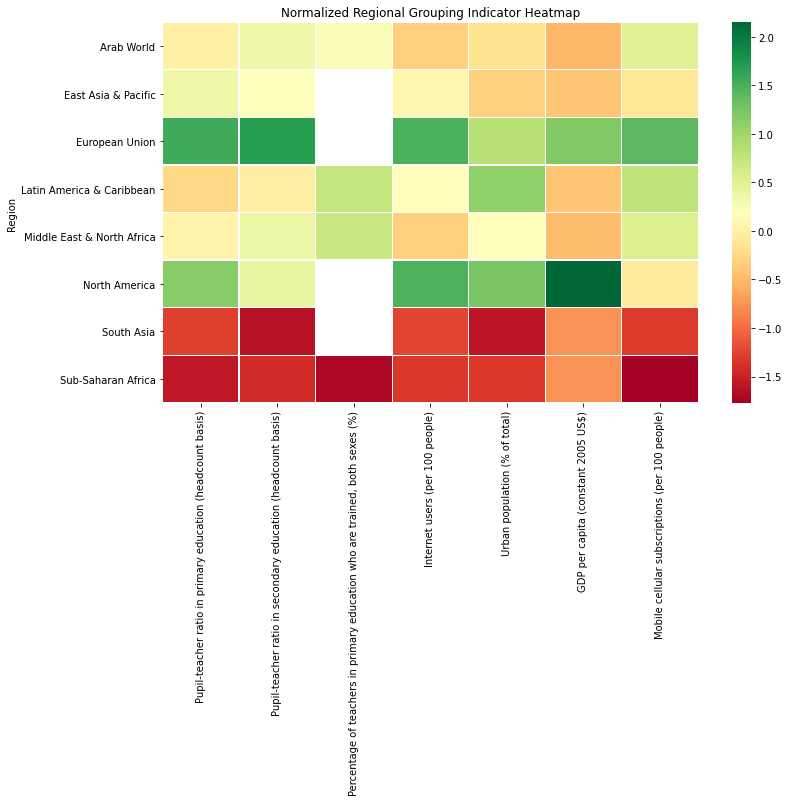

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(regional_groupings, cmap ='RdYlGn', linewidths = 0.30, annot = False).set(title='Normalized Regional Grouping Indicator Heatmap', ylabel='Region')

[Text(86.99999999999999, 0.5, 'Income Grouping'),
 Text(0.5, 1.0, 'Normalized Income Grouping Indicator Heatmap')]

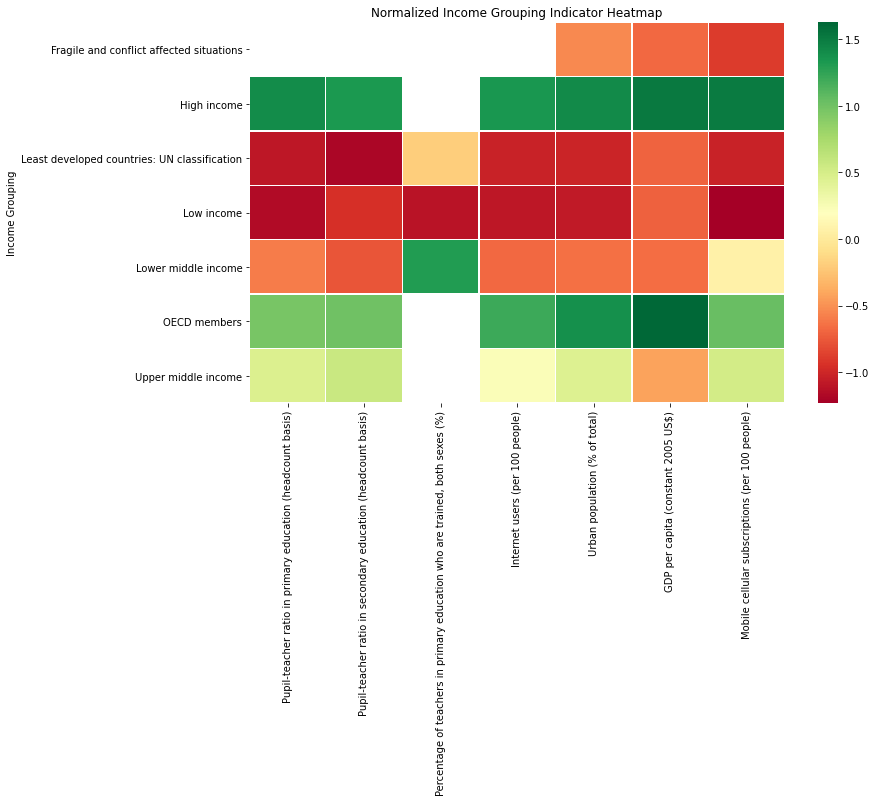

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(income_groupings, cmap ='RdYlGn', linewidths = 0.30, annot = False).set(title='Normalized Income Grouping Indicator Heatmap', ylabel='Income Grouping')

[Text(86.99999999999999, 0.5, 'Region & Income Grouping'),
 Text(0.5, 1.0, 'Normalized Region and Income Grouping Indicator Heatmap')]

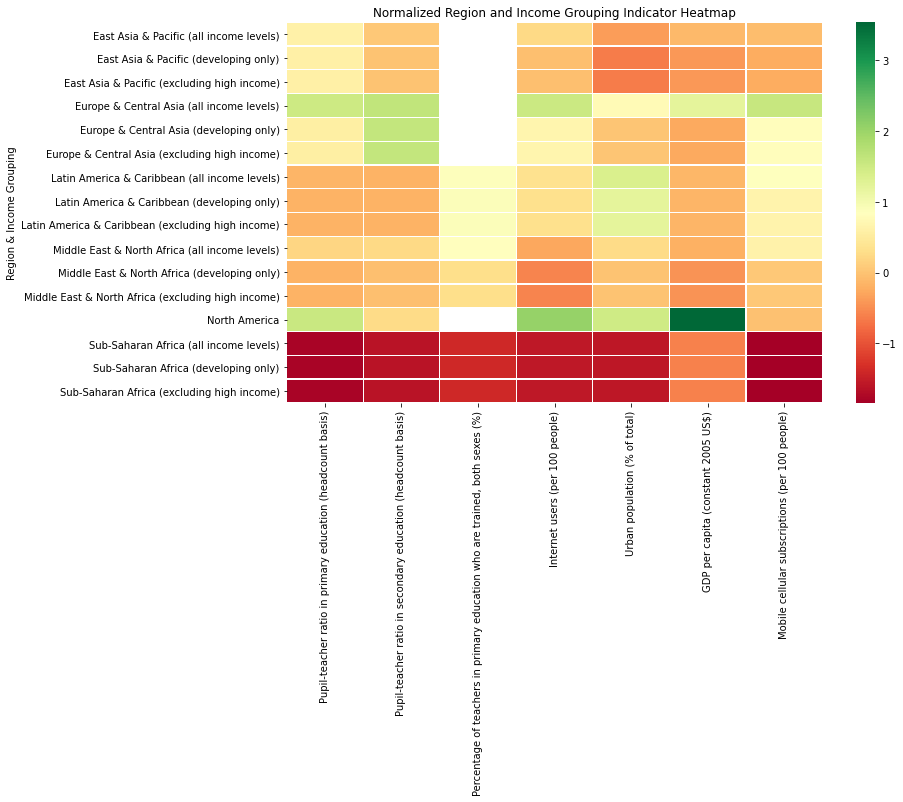

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(region_income_groupings, cmap ='RdYlGn', linewidths = 0.30, annot = False).set(title='Normalized Region and Income Grouping Indicator Heatmap',ylabel='Region & Income Grouping')

The geographical heatmaps show the exhibit amount of correlation in the data. Countries tend to fare equally well or poorly across all the indicators, having varied performance depending on the indicator. The most visible examples of this is North America and Europe, which have scores that are almost uniformly high across indicators, whereas Africa has scores that are almost uniformly low.

As can be expected, the income heatmap reveals that countries' performance across the education indicators is very highly correlated with income.

On the topic of income, GDP per capita in high income and OECD countries is so much higher than in low and middle income countries that, even when standardized, it's almost impossible to see variation in the GDP per capita colors in the heatmap.

Latin America, though its performance across the education indicators is very comparable to Asia and MENA, stands out as a region with a high level of urbanization when compared to other developing regions.

## Time lag

Educating a population doesn't have an immediate impact on development. Instead, there is a time lag between giving a country's workforce a better education and increased labor productivity. Therefore, we have to realign the data, so that the features are aligned with a future label value.

Since the average student spends 4-5 years in tertiary education, let's say that the educational data can have an impact on labor productivity (of which GDP per capita is a very good proxy) 5 years in the future.


In [ ]:
label0 = transformed_df[['NY.GDP.PCAP.KD', 'year', 'country_name', 'country_code']]
label0['year'] = label0['year'].apply(lambda x: x-5)
features0 = transformed_df.drop(columns=['NY.GDP.PCAP.KD'])
realigned_df = features0.merge(label0, on=['year', 'country_name', 'country_code'])
realigned_df


,SE.XPD.TOTL.GD.ZS,SE.XPD.CUR.TOTL.ZS,UIS.XSPENDP.FDPUB.FNS,SE.PRM.ENRL.TC.ZS,SE.SEC.ENRL.TC.ZS,UIS.PTRHC.56,UIS.TRTP.0,SE.PRM.TCAQ.ZS,SE.SEC.TCAQ.ZS,UIS.THDUR.0,SE.PRM.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.THDUR.4.A.GPV,SE.COM.DURS,IT.NET.USER.P2,IT.CMP.PCMP.P2,SP.URB.TOTL.IN.ZS,IT.CEL.SETS.P2,year,country_code,country_name,NY.GDP.PCAP.KD
0,3.705910,91.211726,77.018491,13.666670,10.853580,8.248450,81.370579,89.242160,87.807535,3.0,6.0,3.0,4.0,1.0,10.2,8.996285,6.931866,71.164,28.631620,2000,BRN,Brunei Darussalam,36082.947814
1,5.557273,88.762347,65.857049,30.059276,17.108459,14.071750,78.759059,85.708512,91.978654,3.0,5.0,3.0,3.0,1.0,9.0,1.775913,1.608836,35.877,6.658708,2000,CHN,China,2383.932515
2,5.466260,96.398453,70.451508,17.415960,13.555716,9.081420,75.851741,92.113187,92.019604,2.0,6.0,3.0,3.0,2.0,10.0,51.300000,42.023069,79.478,28.429095,2000,CAN,Canada,49358.678512
3,5.186320,85.093577,72.987508,28.127859,23.408029,22.523511,45.549061,64.829207,64.150208,3.0,6.0,2.0,4.0,2.0,8.0,0.318060,0.479462,19.892,0.407236,2000,KEN,Kenya,726.212556
4,4.404291,87.213150,67.043141,14.656430,14.577460,14.537454,80.097092,81.140350,86.267609,2.0,6.0,3.0,4.0,3.0,10.0,7.395629,13.788954,50.120,32.543184,2000,SYC,Seychelles,15189.040515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,3.163995,82.156822,77.389557,30.434851,25.677627,28.895020,43.561459,77.653572,74.047680,3.0,5.0,4.0,3.0,1.8,5.0,0.128927,0.624785,23.817,0.410697,1999,VNM,Vietnam,901.521012
2553,4.290717,87.973228,73.152262,20.082911,14.935418,14.896802,80.373509,87.011537,76.529000,3.0,6.0,3.0,3.0,2.0,10.5,4.720358,14.510550,88.376,20.824667,1999,BHR,Bahrain,25359.488027
2554,6.205120,86.365744,69.592775,22.955280,20.409611,16.084056,60.048345,73.638952,72.427446,2.0,7.0,3.0,2.0,2.0,9.0,2.473166,10.843742,35.604,1.983419,1999,GRD,Grenada,8192.595003
2555,3.573833,95.554955,60.242294,20.909769,11.093980,16.969259,63.951802,81.160654,91.475785,4.0,4.0,5.0,2.0,2.6,11.0,0.030688,1.105597,37.564,0.164732,1999,UZB,Uzbekistan,708.270697


## PCA

Now that there are no NaN values in the data, we can perform a principal components analysis to find which variables appear to play the most significant role in determining GDP per capita 5 years in the future.

In [ ]:
from sklearn.model_selection import train_test_split

new_scaler = StandardScaler()

label = realigned_df[['NY.GDP.PCAP.KD']]
features = realigned_df.drop(columns=['NY.GDP.PCAP.KD', 'year', 'country_code', 'country_name'])
normalized_features = pd.DataFrame(new_scaler.fit_transform(features), columns=features.columns)


x_train, x_test, y_train, y_test = train_test_split(normalized_features, label, test_size=0.2, train_size=0.8)

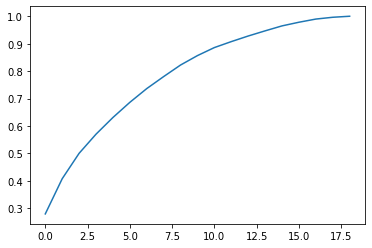

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(x_train.columns))
pca.fit(x_train)

np.set_printoptions(suppress=True)
variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance)



In [ ]:
print(variance)

[0.27932305 0.40762639 0.50030006 0.57004665 0.63085215 0.68611524
 0.73624441 0.78004513 0.82218789 0.85656502 0.88581996 0.90752046
 0.9279424  0.94674377 0.96482519 0.97816137 0.98970534 0.99625041
 1.        ]


The PCA is without a very visible "elbow" in the level of explained variance. It appears that no few features explain the majority of the variance. For this reason, we are not going to be dropping any features before fitting models to the data.

## Feature Correlation

Let's check how many of our features are strongly correlated with one another.

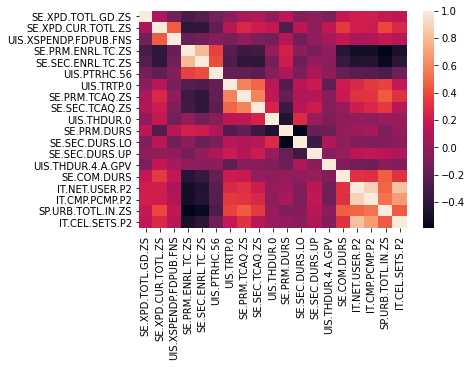

In [ ]:
corr = features.corr()
sns.heatmap(corr)

In [ ]:
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i][j] >= 0.50:
      print(corr.columns[i], '\t', corr.columns[j], corr.iloc[i][j])

SE.PRM.ENRL.TC.ZS 	 SE.SEC.ENRL.TC.ZS 0.7917624502642449
UIS.TRTP.0 	 SE.PRM.TCAQ.ZS 0.5869498550375434
SE.PRM.TCAQ.ZS 	 SE.SEC.TCAQ.ZS 0.5848020911839442
IT.NET.USER.P2 	 IT.CMP.PCMP.P2 0.8926888687372673
IT.NET.USER.P2 	 IT.CEL.SETS.P2 0.8195696240805653
IT.CMP.PCMP.P2 	 SP.URB.TOTL.IN.ZS 0.527981357726837
IT.CMP.PCMP.P2 	 IT.CEL.SETS.P2 0.6790717971049731


There is some correlation among the features, but it doesn't appear to be problematically large. The correlations that are visible are the ones that would be expected, such as internet users and personal computers; enrollment in primary education and enrollment in secondary education; primary education teachers who are trained and secondary education teachers who are trained, etc.

Perhaps more interesting is the negative correlation. The fact that enrollment in education is noticeably negatively correlated with use of technology is interesting and not necessarily intuitive.


However, we've run models both with and without these correlated features at different cutoffs (0.75, 0.80), and it seems that leaving these features in the data produced better results. As such, this signals that multicollinearity doesn't seem to be as strong of an issue as expected. We'll discuss this a bit more in the analysis section.

This just supports the conclusion from the PCA that we should keep all of the features.

# **Part III: Modeling**

## Linear Regression

To gain a baseline accuracy of our model, let's run a simple linear regression on the data over all the variables, not taking into account the findings from the PCA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

#RMSE
ols_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ols_rmse



11407.8951759565

Let's take a look at some of the other indicators of fit of this regression.

In [ ]:
#R squared
r2 = r2_score(y_pred, y_test)
#Adjusted R squared
adjusted_r2 =  1 - (1-r2)*((1 - len(x_train))/(1 - len(x_train) - reg.coef_.size))

print('R2:  ' + str(r2) + '\nadjusted R2:  ' + str(adjusted_r2))


R2:  0.66968540493564
adjusted R2:  0.6727275655300282


Running the linear regression for various epochs and averaging MSEs:

In [ ]:
num_epochs = 50

errors = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = reg.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))


Average RMSE:  11775.70258947398


The linear regression is quite high. Let's see if regularization improves the model. Since we observed from PCA that most of the variables are relatively important, we can hypothesize that an L2 or "Ridge" regularization will create a better fit than an L1 or "Lasso" regularization.

## Regularization

In [ ]:
from sklearn.linear_model import RidgeCV

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
r2 = np.sqrt(mean_squared_error(y_test, ridge_predict))
print('Ridge regularization RMSE:   ' + str(r2))

Ridge regularization RMSE:   12845.590548707545


Running for various epochs:

In [ ]:
errors = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = ridge.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))

Average RMSE:  11745.905291401099


Regularization appears to create a marginally better model. However, let's see if we can try ensemble learning to create an even better one. Furthermore, we can utilize GridSearch cross validation to find the best hyperparameters for our ensemble learning model.



## KNN

One interesting note is that the linear models seem to be performing poorly. This makes us wonder about the nature of our dataset--is it non-linear? To test this hypothesis, we will try a KNN regressor to see the what happens.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Create and fit our KNN model
neighbor = [3, 4, 5]
param_grid = {'n_neighbors': neighbor}
knn = KNeighborsRegressor()
GS_object = GridSearchCV(knn, param_grid, n_jobs=-1, scoring='r2')
GS_object.fit(x_train, y_train)

knn_optimized = KNeighborsRegressor(n_neighbors=GS_object.best_params_.get('n_neighbors'))
knn_optimized.fit(x_test, y_test)

# Let's predict some of our testing set here...
errors = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = knn_optimized.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))

Average RMSE:  9786.524014988645


Intersting! It seems that the non-linear model has performed decently, at least a bit better than the linear models. While the upgrade isn't signficiant, this may be a interesting insight into the true nature of our dataset and the relationship of our features. We'll take this hypothesis and try some more powerful models and see if it holds up.

## Ensemble Learning

### Random Forest Regressor

We'll begin with the classic ensemble model--the random forest regressor. Since we have some hints to the non-linearity of the dataset, we should expect this model to perform decently well.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

k = 140
depth = [10,15,20]
param_grid = {'max_depth': depth}
rfr = RandomForestRegressor(n_estimators = k)
GS_object = GridSearchCV(rfr, param_grid, n_jobs=-1, scoring='r2')
GS_object.fit(x_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=140, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
rfr_optimized = RandomForestRegressor(n_estimators = 140, max_depth=GS_object.best_params_.get('max_depth'))
rfr_optimized.fit(x_test, y_test)
y_pred = rfr_optimized.predict(x_test)

In [ ]:
rfr_r2 = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:   ' +  str(rfr_r2))

RMSE:   3087.0607369524837


In [ ]:
errors = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = rfr_optimized.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))

Average RMSE:  6968.167111800018


That mean squared error is phenomenal!! It's substantially lower than the results from the standard OLS regression and the L2 regularized regression. Let's see if there there is a better ensemble learning method.

### Stacked Ensemble

Since random forest is a style of bagging ensemble classifier for decision trees, let's try stacking together some classic models to form a new model. Since we are working with continuous data, we'll use the regressor versions of each classifier.

In [ ]:
# from sklearn import model_selection
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


# Create estimators
estimator = []
estimator.append(('linear', LinearRegression()))
estimator.append(('decision_tree', DecisionTreeRegressor()))
estimator.append(('svm', SVR()))


# Voting classifier creation and fitting
stacked_ensemble = VotingRegressor(estimators=estimator)
stacked_ensemble.fit(x_train, y_train)

# ...and as usual, the prediction and RMSE
errors = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = stacked_ensemble.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))



Average RMSE:  10950.115803092334


The stacking algorithm did achieve its intended goal--outperform every individual model in the ensemble. Individually, the linear regression, decision tree regression, and the SVR did not perform as very well from a RMSE standpoint. Although the stacking did help make the best of all the individual models, it hasn't outperformed the decision forest. As such, it's reasonable to conclude that the data is actually quite segmented and non-linear--we can try another ensemble method utilizing mutliple weaker learners for better results.



### AdaBoost

To this end, let's try the highly-regarded AdaBoost algorithm. In theory, this optimized learning strategy AdaBoost implements should work comparably, if not better, than the other ensemble models. It should definitely outperform the stacking, but should hopefully outstretch the decision forest as well. What would be intersting is to see AdaBoost use a linear versus a non-linear regressor as the model it runs with and compare the two.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Create and fit our AdaBoost models
ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=GS_object.best_params_.get('max_depth')),
    n_estimators=200
)
ada.fit(x_train, y_train)

ada_linear = AdaBoostRegressor(
    LinearRegression(),
    n_estimators=200
)
ada_linear.fit(x_train, y_train)

# Let's predict some of our testing set here...
errors = []
errors_linear = []
for i in range(num_epochs):
  x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, train_size=0.8)
  y_pred = ada.predict(x_test)
  errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))
  y_pred = ada_linear.predict(x_test)
  errors_linear.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Average RMSE:  ' + str(np.average(errors)))
print('Average linear RMSE:  ' + str(np.average(errors_linear)))


Average RMSE:  928.4174936578489
Average linear RMSE:  12960.476287988939


Nice! This is by far the best RMSE we've achieved so far. The re-weighting strategy AdaBoost applies truly allows the multiple classifiers to not only fit well around the training data, but also avoid overfitting issues that plagues most other classifiers (especially decision trees).

This also serves as the best piece of evidence about the non-linearity of the dataset. The clear difference between the linear and non-linear AdaBoost versions can attest to this. The AdaBoost version using a linear regression base performed extremely poorly.

## K-Fold Cross Validation

Now that we have a good set of candidate models, let's do one final test to see which ones truly outperforms the group. In total, we currently have three models and we'll be performing a K-fold cross-validations

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# LinReg
print(cross_val_score(reg, features, label, cv=10, scoring='neg_mean_squared_error').mean())

# Ridge
print(cross_val_score(ridge, features, label, cv=10, scoring='mse').mean())

# KNN
print(cross_val_score(knn_optimized, features, label, cv=10, scoring='mse').mean())

# Random forest
print(cross_val_score(rfr_optimized, features, label, cv=10, scoring='mse').mean())

# Stacked
print(cross_val_score(stacked_ensemble, features, label, cv=10, scoring='mse').mean())

# AdaBoost
print(cross_val_score(ada, features, label, cv=10, scoring='mse').mean())
print(cross_val_score(ada_linear, features, label, cv=10, scoring='mse').mean())

-147590892.80933827


ValueError: ignored

It seems that the best model here is the AdaBoost algorithm, followed closly by the random forest. Based on the structure of the algorithms, as well as our revelation of the "segmented" and non-linear nature of our data, it's easy to see how those two performed the best. They are the algorithms desined to tackle datasets like these.



# **Part IV: Interpreting Findings**




## Analysis of Dataset

Based on the quality of our models, it's clear that our dataset and features are non-linear. We can come to this conclusion because it seems that, as a whole, any of these features cannot be properly modeled by a linear model--the overall performance, even for a stacked ensemble of the typical linear models, performed generally poorly. On average, they didn't exceed a score of 0.75.

What this signals to us is that there may be less independence between features that we anticipated. We orignally checked the correlations between the features and some were decently high but not enough to cause a decease in accuracy. This gives us some more insight into our data--the features need to be used together, even though they're not exactly independent, to form a better predictive result. This is why non-linear algorithms like AdaBoost fit the data very well while taking a decently significant hit when certain higher-correlated features are removed.

Even though this is the case, it'd be interesting to analyze which features have a stronger impact on GDP results. Given that we hope this analysis is useful for future political policy direction, it's important that we also analyze what features or groups of features politictians should target first.


## Feature Importances

We now seek to find which features are the biggest drivers of GDP for each country. Since our Ada model appears to be our best model, we will use the model as our basis for determining the most significant features. We do this by applying sklearn's feature_importances_ to our Ada model. The method returns the Gini importances of each feature.

Gini importance is defined as follows:

"Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits."

In [ ]:
import matplotlib as plt
from matplotlib import pyplot

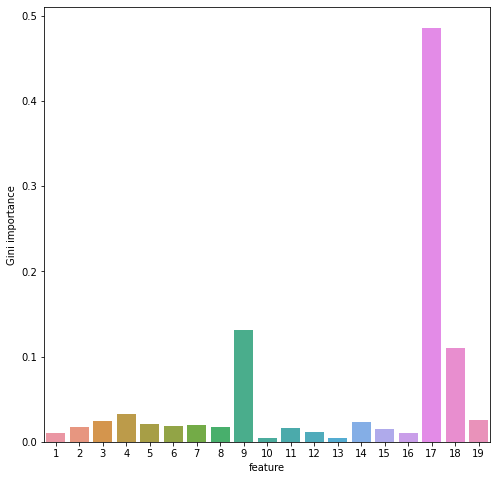

In [ ]:
important_features = ada.feature_importances_
important_features

importance_dct = {}
for i in important_features:
  key = np.ndarray.tolist(important_features).index(i) +1
  importance_dct[key] = i

keys = list(importance_dct.keys())
vals = list(importance_dct.values())

#vals = np.ndarray.tolist(important_features)
fig, ax = pyplot.subplots(figsize=(8, 8))
pyplot.xlabel("Feature")
pyplot.ylabel("Gini importance")
sns.barplot(x = keys, y = vals)

The result of the analysis shows that feature **17**, which is **duration of compulsory education**, has the highest Gini importance in predicting a country's GDP per capita in the near future. The feature is followed by features **9** and **18**, which are **percentage of trained teachers in lower secondary ed** and **number of internet users**, respectively.  

To test our findings, we now compare the result to our optimized random forest regressor model. We do so by applying the same method to the random forest model.

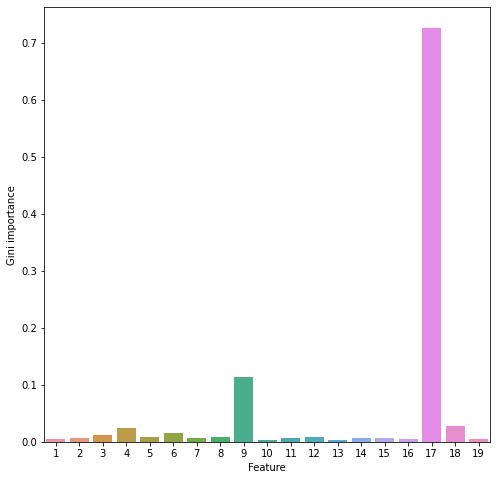

In [ ]:
important_features = rfr_optimized.feature_importances_

importance_dct = {}
for i in important_features:
  key = np.ndarray.tolist(important_features).index(i) +1
  importance_dct[key] = i

keys = list(importance_dct.keys())
vals = list(importance_dct.values())

#vals = np.ndarray.tolist(important_features)
fig, ax = pyplot.subplots(figsize=(8, 8))
pyplot.xlabel("Feature")
pyplot.ylabel("Gini importance")
sns.barplot(x = keys, y = vals)

As shown above, feature 17 remains the most important feature, followed by features 9 and 18.

## Duration of Compulsory Education

Since the best models agree that the duration of compulsory education is the most important feature, let's investigate why this might be the case.

[Text(0, 0.5, 'GDP/cap (USD)'),
 Text(0.5, 0, 'Duration of compulsory education (years)'),
 Text(0.5, 1.0, 'Compsulory Education vs. GDP/cap with Imputed Data')]

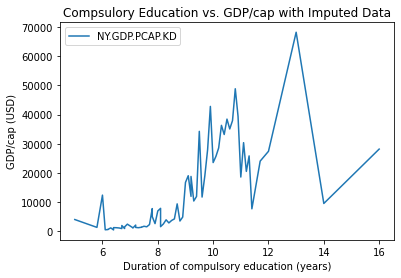

In [ ]:
com_durs_grouped = realigned_df[['SE.COM.DURS','NY.GDP.PCAP.KD']].groupby(by='SE.COM.DURS').mean()
com_durs_grouped.plot.line().set(title='Compsulory Education vs. GDP/cap with Imputed Data', xlabel='Duration of compulsory education (years)', ylabel='GDP/cap (USD)')

[Text(0, 0.5, 'GDP/cap (USD)'),
 Text(0.5, 0, 'Duration of compulsory education (years)'),
 Text(0.5, 1.0, 'Compsulory Education vs. GDP/cap with Imputed Data')]

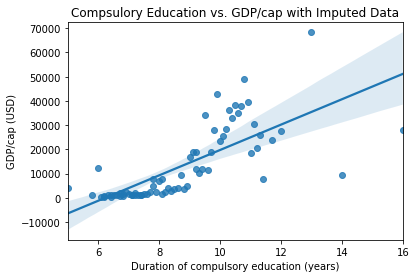

In [ ]:
sns.regplot(com_durs_grouped.index, com_durs_grouped['NY.GDP.PCAP.KD']).set(title='Compsulory Education vs. GDP/cap with Imputed Data', xlabel='Duration of compulsory education (years)', ylabel='GDP/cap (USD)')

In [ ]:
intermed_df = realigned_df[['SE.COM.DURS','NY.GDP.PCAP.KD']]
score = LinearRegression().fit(intermed_df[['SE.COM.DURS']], intermed_df[['NY.GDP.PCAP.KD']]).score(intermed_df[['SE.COM.DURS']], intermed_df[['NY.GDP.PCAP.KD']])
print('Regression Score:   ' + str(score))

Regression Score:   0.10026190136905144


As can be observed from the data, there is a bit of positive correlation between the duration of compulsory education and GDP per capita in five years' time. However, the relationship is anything but linear, as the extremely low R^2 score shows. The standard error of this data is incredibly heteroscedastic, with extraordinarily more variance observed at higher levels of compulsory education.

[Text(0, 0.5, 'GDP/cap (USD)'),
 Text(0.5, 0, 'Duration of compulsory education (years)'),
 Text(0.5, 1.0, 'Compsulory Education 7.5-11yrs vs. GDP/cap')]

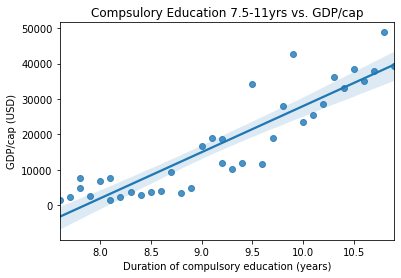

In [ ]:
time_com_durs_grouped = realigned_df[['SE.COM.DURS','NY.GDP.PCAP.KD']]
time_com_durs_grouped = time_com_durs_grouped[(time_com_durs_grouped['SE.COM.DURS'] > 7.5) & (time_com_durs_grouped['SE.COM.DURS'] < 11)].groupby(by='SE.COM.DURS').mean()
sns.regplot(time_com_durs_grouped.index, time_com_durs_grouped['NY.GDP.PCAP.KD']).set(title='Compsulory Education 7.5-11yrs vs. GDP/cap', xlabel='Duration of compulsory education (years)', ylabel='GDP/cap (USD)')

In [ ]:
intermed_df = realigned_df[['SE.COM.DURS','NY.GDP.PCAP.KD']]
intermed_df = intermed_df[(intermed_df['SE.COM.DURS'] > 7.5) & (intermed_df['SE.COM.DURS'] < 11)]
score = LinearRegression().fit(intermed_df[['SE.COM.DURS']], intermed_df[['NY.GDP.PCAP.KD']]).score(intermed_df[['SE.COM.DURS']], intermed_df[['NY.GDP.PCAP.KD']])
print('Regression Score:   ' + str(score))

Regression Score:   0.11808035329891642


In [ ]:
all_data = realigned_df[['SE.COM.DURS','NY.GDP.PCAP.KD']]
restricted_data = len(time_com_durs_grouped)
proportion_in_window = len(all_data[(all_data['SE.COM.DURS'] > 7.5) & (all_data['SE.COM.DURS'] < 11)])/len(all_data)
proportion_6_to_11 = len(all_data[(all_data['SE.COM.DURS'] > 6) & (all_data['SE.COM.DURS'] < 11)])/len(all_data)
print('Proportion of countries with compulsory education 7.5 to 11 years: ' + str(proportion_in_window))
print('Proportion of countries with compulsory education 6 to 11 years: ' + str(proportion_6_to_11))

Proportion of countries with compulsory education 7.5 to 11 years: 0.6229956980836918
Proportion of countries with compulsory education 6 to 11 years: 0.7281971059835745


However, when the variables at the extremes of the distribution are eliminated, suddenly the relationship looks a lot more linear. Though the R^2 of the linear regression is not substantially better, it is quite visible to the eye that the relationship looks a substantially more linear.

And as we calculated above, ~62% of the data falls in the range of 7.5-11 years (exclusive) and ~73% of the data falls in the range of 6-11 years (exclusive). Therefore, since the majority of the data falls in the range where this linear relationship is very explicity, **we hypothesize that this is the reason the model identified the duration of compulsory education as so important**.

## Conclusion

Correlation does not imply causation. However, of all of the education features examined, the feature that was most important in predicting future economic growth was the duration of compulsory education. This is an important fact that policy makers should take into account when implementing education reform. Extremely highly educated individuals are important for the development of any economy. However, our findings indicate that longer education for the less educated in society (those who plan on just studying as along as is obligatory) has an outsized impact on economic growth.

Additionally, a key finding is that the vast majority of features we analyzed don't appear to have a clear relationship with economic growth in the medium term. While we hypothesized that increased spending on education, a lower student-to-pupil ratio, increased trainging of educators, etc. would make a huge contribution to the economic development of a country, our findings didn't reflect this assumption.

Perhaps an even more important insight is the fact that educational indicators can so accurately predict economic growth in the medium term. Clearly, investment in human capital has huge benefits for an economy. Education is frequently a topic that's overlooked when planning economic policy. However, considering the AdaBoost and Random Forest models have scores in the neighborhood of 95+%, our findings indicate that economists and policy makers should pay more attention to the models' key features when developing long-term economic growth strategies.

## Risks & Weaknesses in Methodology
One major challenge of this project is the sparsity of the data. After all of the data cleaning, still vast amounts of data had to be imputed.

In [ ]:
dct = {}
for column in reduced_df.columns:
  # number of rows with values
  val = len(reduced_df[column].dropna())
  percentage_valid = val/len(reduced_df[column])
  dct[column] = percentage_valid

print('Percentage of observations for each feature that are non null (cleaned data): ')
dct

Percentage of observations for each feature that are non null (cleaned data): 


{'IT.CEL.SETS.P2': 0.9909277143693298,
 'IT.CMP.PCMP.P2': 0.5109745390693591,
 'IT.NET.USER.P2': 0.9654667837284168,
 'NY.GDP.PCAP.KD': 1.0,
 'SE.COM.DURS': 0.7500731635937957,
 'SE.PRM.DURS': 1.0,
 'SE.PRM.ENRL.TC.ZS': 0.7213930348258707,
 'SE.PRM.TCAQ.ZS': 0.27158326016973955,
 'SE.SEC.DURS.LO': 0.9988293824992683,
 'SE.SEC.DURS.UP': 0.9988293824992683,
 'SE.SEC.ENRL.TC.ZS': 0.5197541703248464,
 'SE.SEC.TCAQ.ZS': 0.15539947322212466,
 'SE.XPD.CUR.TOTL.ZS': 0.32133450395083407,
 'SE.XPD.TOTL.GD.ZS': 0.5888206028680129,
 'SP.URB.TOTL.IN.ZS': 1.0,
 'UIS.PTRHC.56': 0.48170910155106816,
 'UIS.THDUR.0': 1.0,
 'UIS.THDUR.4.A.GPV': 0.5572139303482587,
 'UIS.TRTP.0': 0.17793386011120865,
 'UIS.XSPENDP.FDPUB.FNS': 0.29616622768510387,
 'country_code': 1.0,
 'country_name': 1.0,
 'year': 1.0}

For some features, a substantial amount of data had to be imputed. For the most 'important' feature - Duration of compulsory education - only 75% of the values were non-null. For other important features, such as the percentage of trained teachers in lower secondary education, the percentage of data that's non-null is substantially lower. The third most important feature, though, the share of population with access to the internet, has values for over 96% of the observations.

The high level of value imputation in this dataset could have introduced some bias into our findings. The K-nearest neighbor approach to value imputation, which considered GDP per capita as an incredibly important factor for determining "neighbors", could have artificially accentuated some trends in the data.


In [ ]:
share_poor = len(reduced_df[reduced_df['NY.GDP.PCAP.KD'] < 30000])/len(reduced_df)
share_rich = len(reduced_df[reduced_df['NY.GDP.PCAP.KD'] > 30000])/len(reduced_df)

print('Share of poor observations:  ' + str(share_poor) + '\nShare of rich observations:  ' + str(share_rich))

Share of poor observations:  0.8241147205150717
Share of rich observations:  0.1758852794849283


A second challenge that this study observed is the imbalance in observations. Even though there is more data on rich countries, there are so many more developing countries that over 82% of the observations come from countries with a GDP per capita below $30k USD.

This imbalance in data first increased the amount of values that had to be imputed (as I mentioned previously, generally speaking the poorer the country, the poorer the infomration available on it). Second, this could have created added bias in the data, as, as we've shown above, almost all of the features we're investigating are correlated with GDP per capita.

Another massive challenge with this methodology is that we considered observations "uniformly". Every country is in very unique circumstances, and accordingly the drivers of economic growth in each are different. For example, a "service-based" economy might benefit a lot more from increasing the quality of education than an agricultural economy. While "middle income" industrial economies in Asia really depend on exports of manufactured goods to grow their economies, least developed countries (LDCs) still depend on commodities and their GDP will react accordingly to shocks in the prices of minerals, petroleum and agricultural goods.

Unfortunately, because the data was already really sparse, it wasn't possible to create separate models.

However, perhaps the greatest hole in our approach was that these models did not prove causation. They just investigated correlation. The models show that there is a huge correlation between the compulsory duration of education and a few other features and economic growth, yet further research would need to be conducted to conclude whether or not these features actually *contributed* to the observed economic growth. One can easily assume that access to the internet, one of the most "important" features in the data, may both contribute to economic growth AND reflect that economic growth.

To investigate this, we would have to take on the impossible task of controlling for all the possible variables that could potentially contribute to economic growth and then compare how differences in a certain feature (e.g. Duration of compulsory education) result in different levels of economic growth. Because the features to control for are *so* numerous, we considered this approach well beyond the scope of this project.